layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  32   ->   208 x 208 x  32
    2 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    4 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    5 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    6 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    7 max          2 x 2 / 2   104 x 104 x 128   ->    52 x  52 x 128
    8 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256  1.595 BFLOPs
    9 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128  0.177 BFLOPs
   10 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256  1.595 BFLOPs
   11 max          2 x 2 / 2    52 x  52 x 256   ->

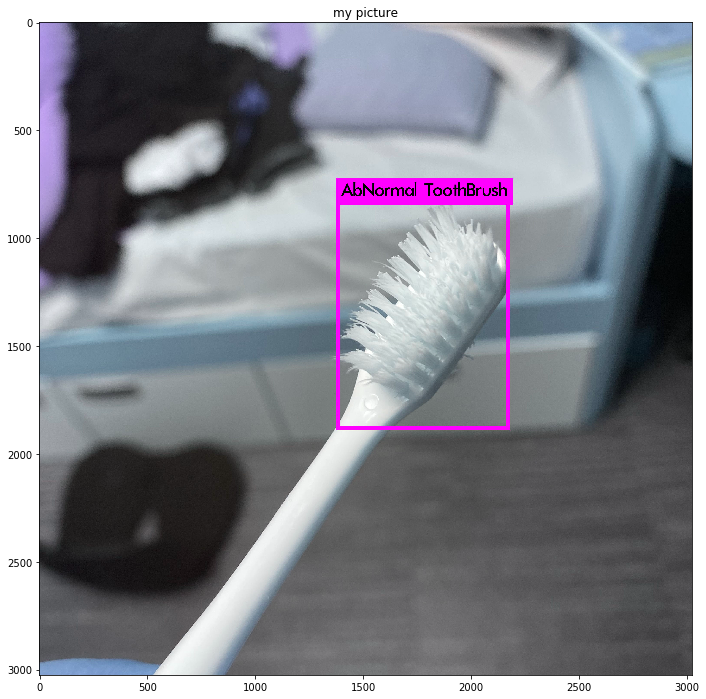

In [3]:
!./darknet detector test data/obj.data yolo-obj.cfg backup/yolo-obj_final.weights data/img/test1.jpg

from IPython.display import Image
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('predictions.jpg')
plt.figure(figsize=(12, 12))
plt.imshow(img)

plt.title('my picture')
plt.show()

3429it [00:00, 845717.30it/s]
100%|██████████| 343/343 [00:00<00:00, 347499.10it/s]


Text(0.5, 1.0, 'Recent 350')

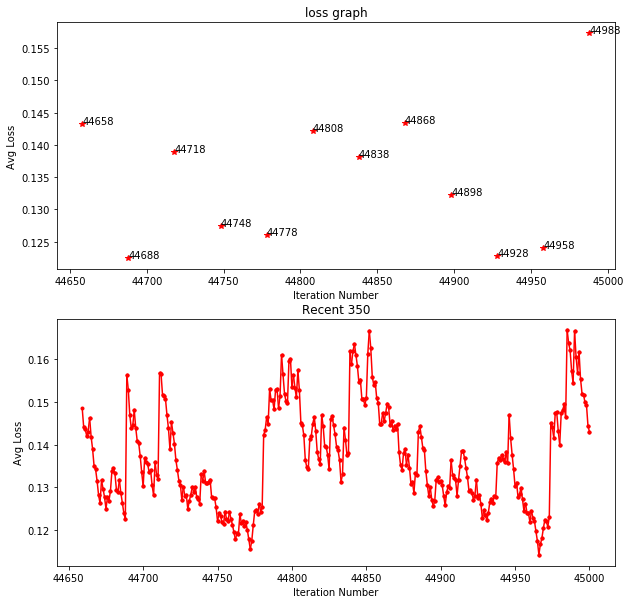

In [4]:
import sys 
import matplotlib.pyplot as plt 
from tqdm import tqdm 

lines = [] 

for line in tqdm(open('./backup/train.log')): 
    if "avg" in line: 
        lines.append(line) 
        iterations = [] 
        avg_loss = [] 
        line_cnt=len(lines)


for i in tqdm(range(line_cnt)): 
    lineParts = lines[i].split(',') 
    iterations.append(int(lineParts[0].split(':')[0])) 
    avg_loss.append(float(lineParts[1].split()[0])) 
    
fig ,ax = plt.subplots(2,1 , figsize = (10,10)) 
start = 0 
#start = 4999 

for i in range(start, line_cnt, 30): 
        ax[0].plot(iterations[i:i+1], avg_loss[i:i+1], 'r*-') 
        #print(iterations[i], avg_loss[i]) 
        ax[0].text(iterations[i], avg_loss[i],str(iterations[i])) 
        
ax[0].set_xlabel('Iteration Number') 
ax[0].set_ylabel('Avg Loss') 
ax[0].set_title('loss graph') 

for i in range(line_cnt-342,line_cnt,):
    ax[1].plot(iterations[i:i+2], avg_loss[i:i+2], 'r.-') 
    
ax[1].set_xlabel('Iteration Number') 
ax[1].set_ylabel('Avg Loss') 
ax[1].set_title('Recent 350') 

#fig.savefig('training_loss_plot.png', dpi=1000)

